## ARIMAX

In [21]:
!pip install pandas statsmodels


In [3]:
#File and name management libraries
import os
import shutil

#Math & data handling libraries
import pandas as pd
import numpy as np

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#dates and timeframe libraries
import datetime
import matplotlib.dates as mdates

In [4]:
#### Root derectory ####

# Change directory one step back and save as the root directory
ROOT_DIR = os.path.normpath(os.getcwd() + os.sep + os.pardir)
print(ROOT_DIR)

D:\gitProjects\WTI_Crude_Oil_Price_Prediction_Using_ML


In [5]:
#### File directory ####

#Define file name and location
file_csv = 'step3_eda_wti_price.csv'
file_path = '\\data\\interim\\'

#Set file name and location
f = ROOT_DIR + file_path + file_csv
print(f)

D:\gitProjects\WTI_Crude_Oil_Price_Prediction_Using_ML\data\interim\step3_eda_wti_price.csv


In [7]:
#cast csv to dataframe
df = pd.read_csv(f)

#convert 'Date' column to date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors="raise")

#set Date as index
df.set_index('Date', drop=True, inplace=True)


In [8]:
#print shape of dataframe
print('Shape:',df.shape)

#display df head
display(df.head(7).round(2).T)

Shape: (280, 29)


Date,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01,2000-07-01
wti,27.26,29.37,29.84,25.72,28.79,31.82,29.70
oil_opec,26.01,26.68,26.61,27.52,28.05,27.64,27.91
oil_nonopec,46.90,46.82,46.94,46.62,46.62,46.78,47.05
oil_world,5.78,5.85,5.92,5.85,5.85,5.82,5.74
henry_hub_ng,47.23,50.23,49.36,46.29,47.34,47.96,47.25
oil_us,28.29,28.77,28.53,28.13,28.22,28.27,28.54
petrol_oecd,1.69,1.70,1.71,1.71,1.71,1.72,1.73
petrol_nonoecd,1.29,1.30,1.31,1.31,1.32,1.32,1.33
us_cpi,0.75,0.84,0.90,0.85,0.88,0.97,0.93
us_ppi,92.02,92.27,92.91,93.54,93.59,93.74,93.84


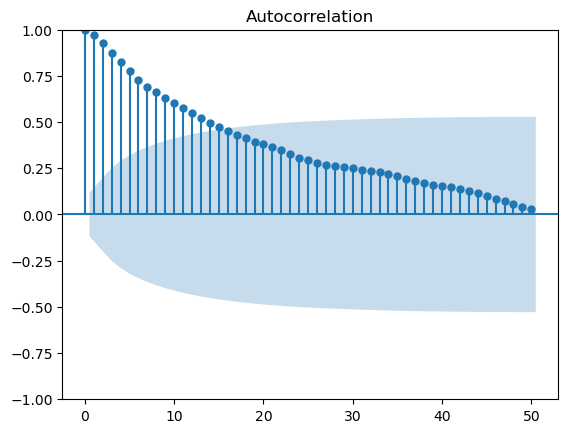

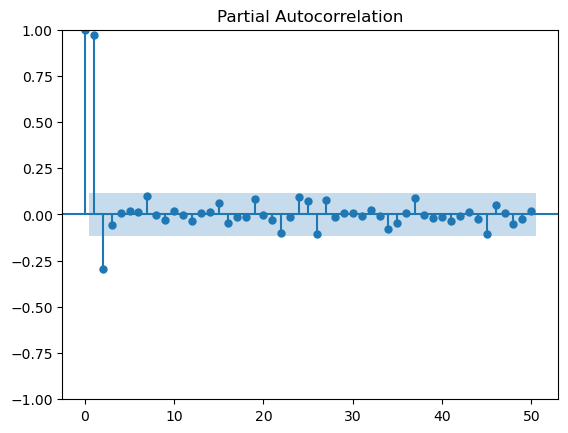

In [10]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assume df is your dataframe and 'price' is your time series column

# Plot the ACF
plot_acf(df['wti'], lags=50)
plt.show()

# Plot the PACF
plot_pacf(df['wti'], lags=50)
plt.show()


In [23]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Assume df is your dataframe and 'price' is your time series column

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Run a grid with pdq parameters calculated to find the best model
best_aic = np.inf
best_pdq = None
tmp_model = None
best_mdl = None

for param in pdq:
    try:
        tmp_mdl = ARIMA(df['wti'], order=param)
        res = tmp_mdl.fit(disp=0)
        if res.aic < best_aic:
            best_aic = res.aic
            best_pdq = param
            best_mdl = tmp_mdl
    except:
        continue

print(f'Best ARIMA model {best_pdq} AIC={best_aic}')


Best ARIMA model None AIC=inf


In [24]:
endog = df['wti']
exog = df.drop('wti', axis=1)


In [26]:
model = sm.tsa.statespace.SARIMAX(endog, exog=exog, order=(1,0,0))
results = model.fit(method='bfgs', maxiter=200)


C:\Users\Farid\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Farid\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


         Current function value: 1.014582
         Iterations: 105
         Function evaluations: 135
         Gradient evaluations: 125


C:\Users\Farid\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                    wti   No. Observations:                  280
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -284.083
Date:                Tue, 11 Jul 2023   AIC                            628.166
Time:                        01:24:52   BIC                            737.210
Sample:                    01-01-2000   HQIC                           671.904
                         - 04-01-2023                                         
Covariance Type:                  opg                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
oil_opec                      0.9221      0.678      1.360      0.174      -0.407       2.251
oil_nonopec                   0.8068      0.633      1.275      0.202      -0.433     

In [28]:
in_sample_preds = results.predict(start=0, end=279, exog=exog)


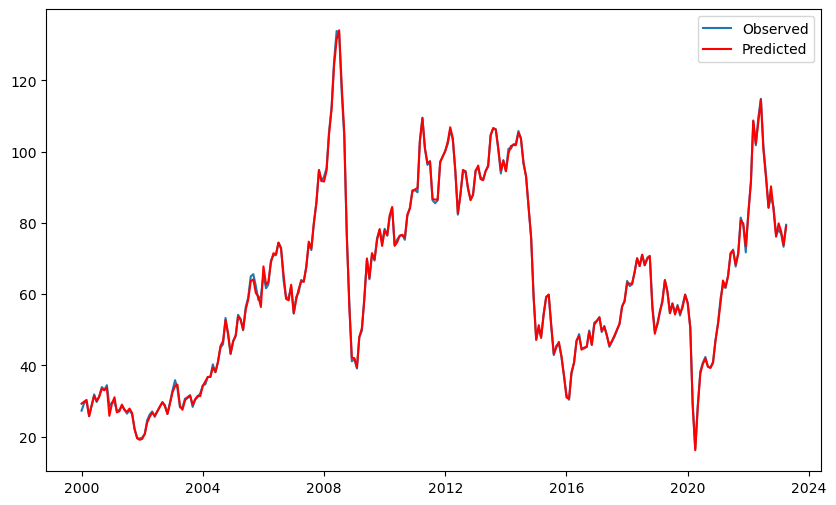

In [29]:
import matplotlib.pyplot as plt

# Assuming you've already run results.predict() to get in_sample_preds

plt.figure(figsize=(10,6))
plt.plot(endog.index, endog, label='Observed')
plt.plot(endog.index, in_sample_preds, color='r', label='Predicted')
plt.legend()
plt.show()


In [32]:
# Forecasting the next 6 months
forecast_steps = 6
forecast = results.get_forecast(steps=forecast_steps, exog=exog)
forecasted_values = forecast.predicted_mean

# Print forecasted values
print(forecasted_values)


ValueError: Provided exogenous values are not of the appropriate shape. Required (6, 28), got (280, 28).

NameError: name 'forecasted_values' is not defined

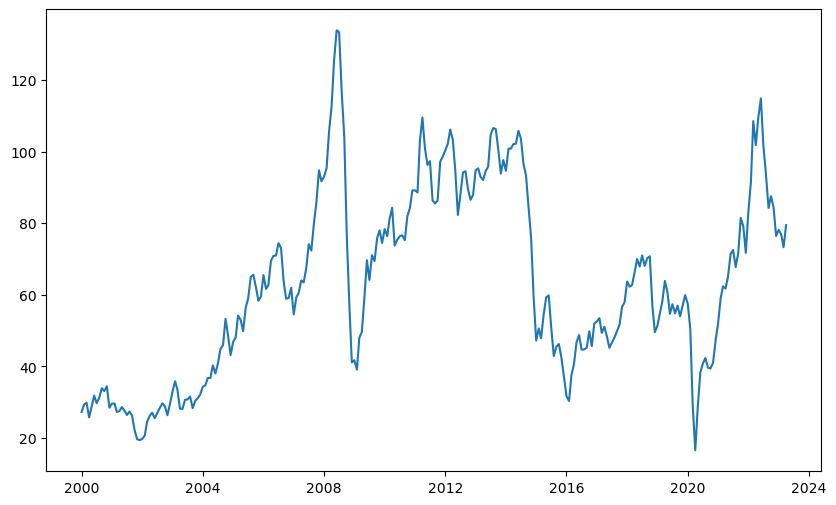

In [31]:
plt.figure(figsize=(10,6))
plt.plot(endog.index, endog, label='Historical')
plt.plot(pd.date_range(endog.index[-1], periods=forecast_steps, freq='M'), forecasted_values, color='r', label='Forecasted')
plt.legend()
plt.show()
